In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


As we can see the tensor of the time serie is a day

In [ ]:
df['date']=pd.to_datetime(df['date'],yearfirst=True)

In [ ]:
df = df.set_index('date')
df = df['sales']

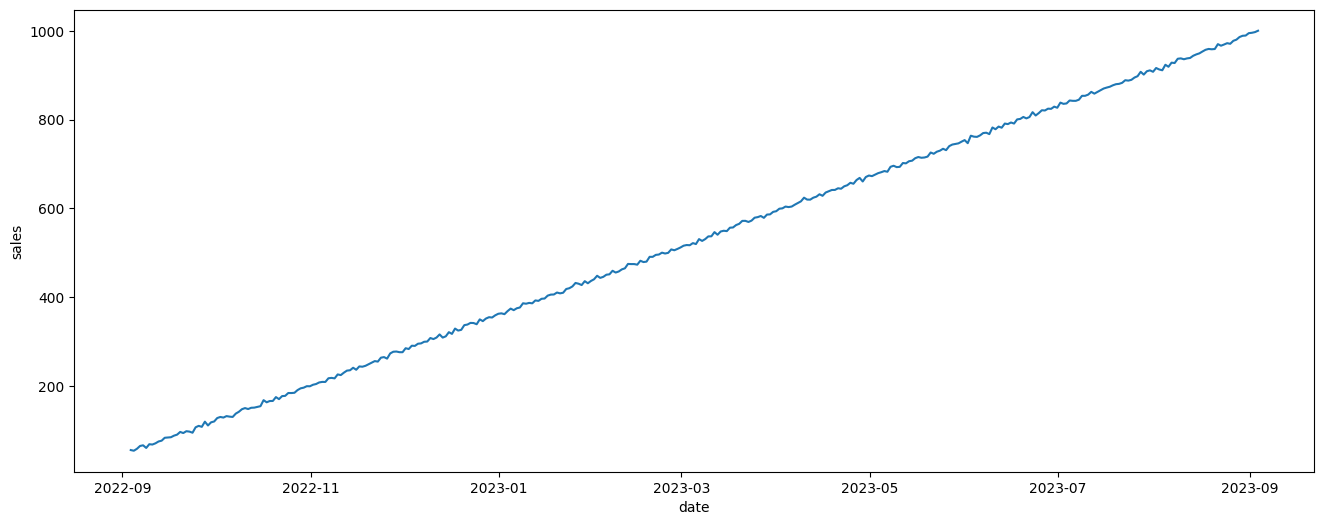

In [ ]:
fig, axis = plt.subplots(figsize = (16, 6))
line_plot = sns.lineplot(data = df)
fig = line_plot.get_figure()

#Stationary study

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Dickey-Fuller test results:


,0
Test Statistic,0.545414
p-value,0.986190
#Lags Used,13.000000
Number of Observations Used,352.000000
Critical Value (1%),-3.449065
Critical Value (5%),-2.869786
Critical Value (10%),-2.571163


Due to the results of the Dickey-Fuller test we can say that the time series is not stationary because it has a p-value higher than 0.05

#Seasonal study

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period = 12)
decomposition

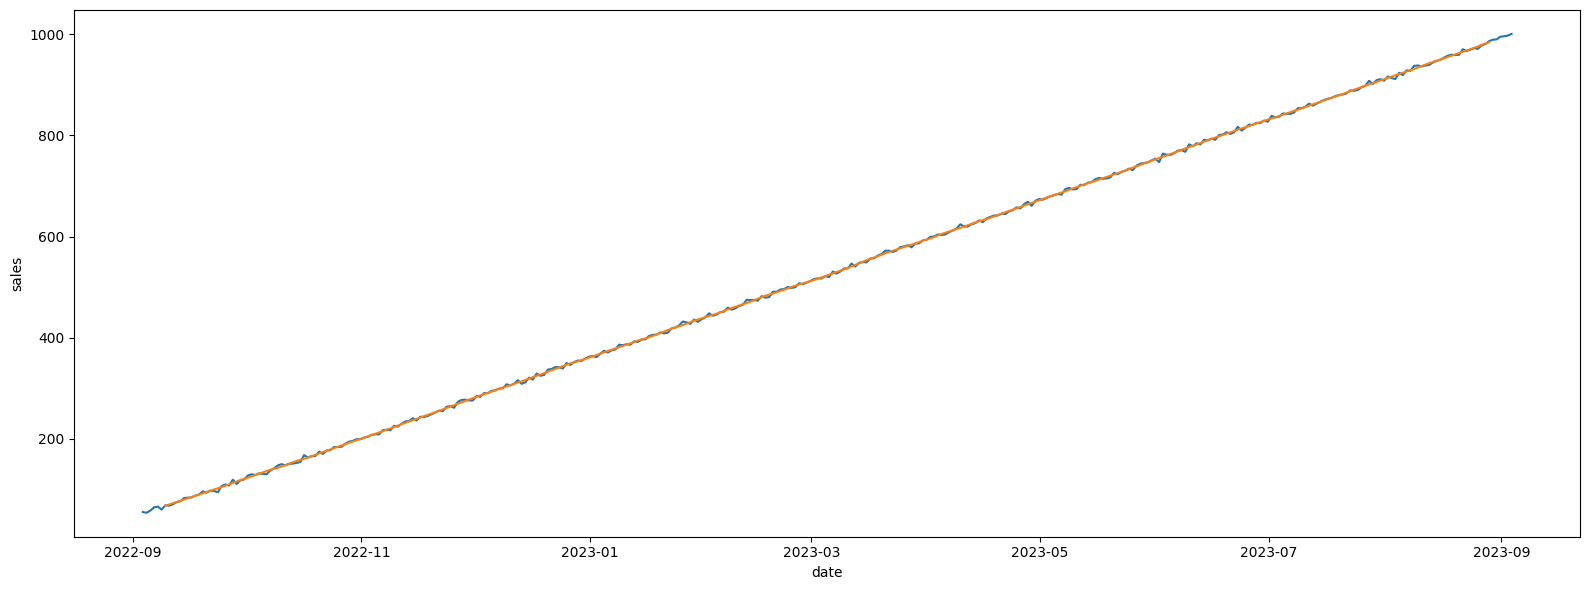

In [ ]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (16, 6))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

We can observe steady growth

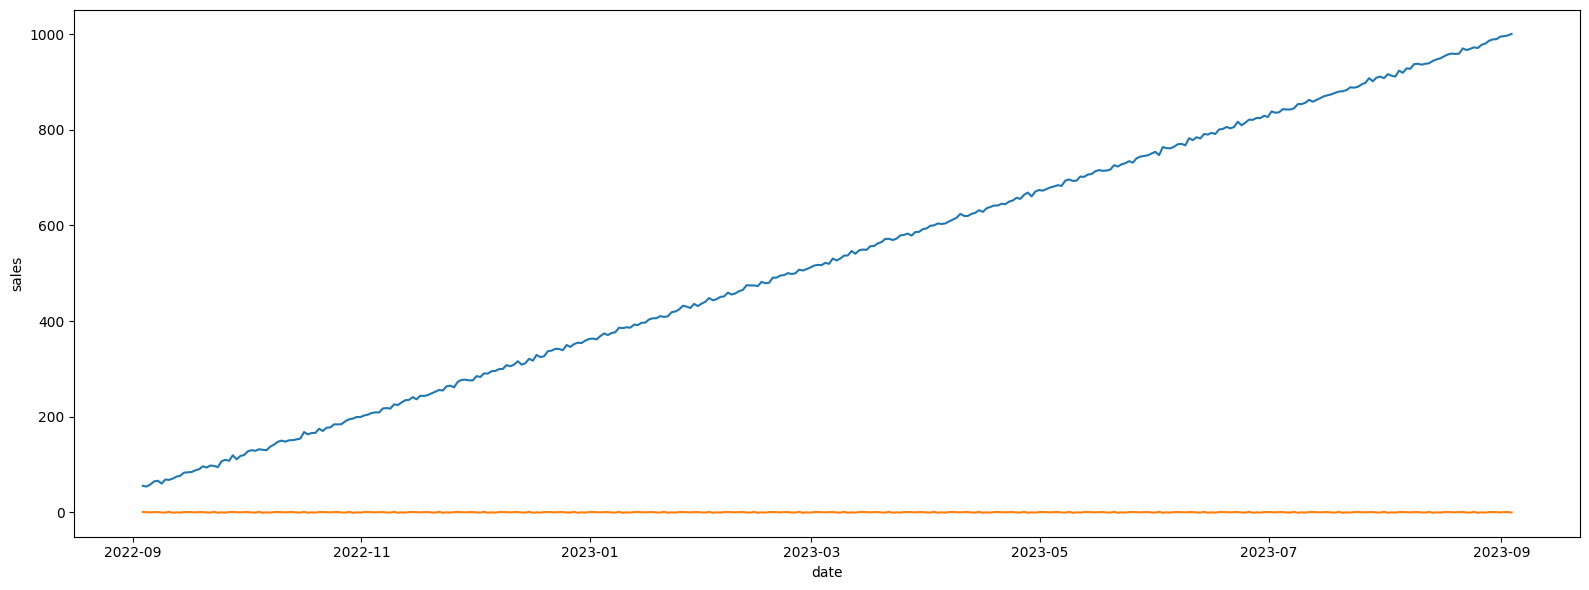

In [ ]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (16, 6))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

It's safe to assume that the sales are no seasonal.

# Autocorrelation Analysis

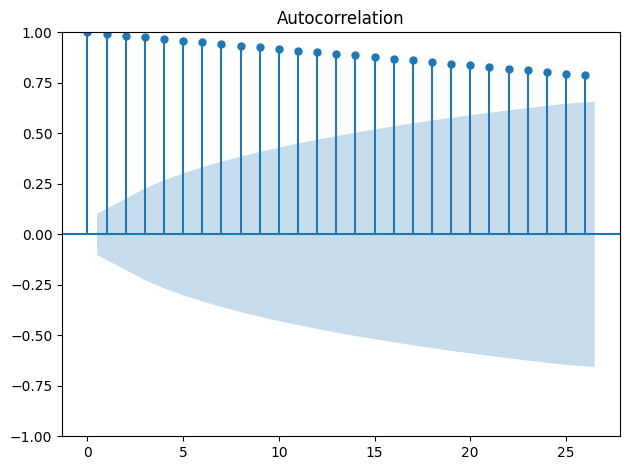

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot = plot_acf(df)

plt.tight_layout()

plt.show(plot)

The correlation is decreasing over time

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

model = auto_arima(df, seasonal = False, trace = True, m = 7)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=1.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=4.47 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 12.929 seconds


The best model is arima(1,1,1)

In [ ]:
predict = model.predict(100)
predict

,0
2023-09-04 17:10:08.079328,1002.158148
2023-09-05 17:10:08.079328,1004.831669
2023-09-06 17:10:08.079328,1007.423289
2023-09-07 17:10:08.079328,1010.021630
2023-09-08 17:10:08.079328,1012.619419
...,...
2023-12-08 17:10:08.079328,1249.022047
2023-12-09 17:10:08.079328,1251.619878
2023-12-10 17:10:08.079328,1254.217709
2023-12-11 17:10:08.079328,1256.815540


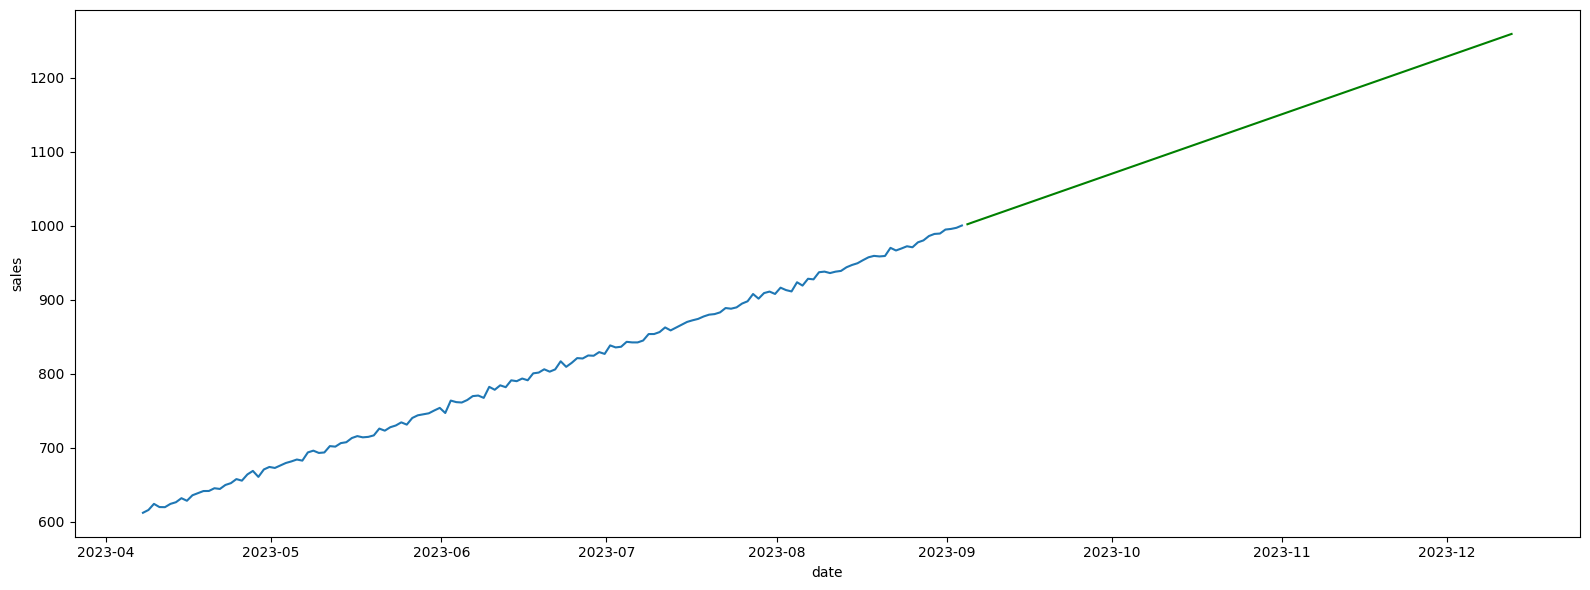

In [ ]:
fig, axis = plt.subplots(figsize = (16, 6))

sns.lineplot(data = df.tail(150))
sns.lineplot(data = predict, c = "green")

plt.tight_layout()

plt.show()